# About the dataset

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

In this, I build a Logistics regression model which predicts whether a
passenger on the Titanic survived or not using passenger data (ie name, age, gender, socio-economic class, etc).

# VARIABLES IN DATASET

**Pclass** represents the passenger class
- 1 = 1st = Upper
- 2 = 2nd = Middle
- 3 = 3rd = Lower

**Survival** represents the passanger survived or not
- 0 = No
- 1 = Yes

**age:** Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

**sibsp:** The ds defines family relations in this way...
- Sibling = brother, sister, stepbrother, stepsister
- Spouse = husband, wife (mistresses and fiancés were ignored)

**parch:** The ds defines family relations in this way...
- Parent = mother, father
- Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.


### Importing required libraries

In [149]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Importing dataset

In [150]:
ds = pd.DataFrame(pd.read_csv("titanic.csv"))
ds.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [151]:
ds.describe(include=['object']) # used to include columns of the object data type (i.e., string or categorical columns)

,Name,Sex,Ticket,Cabin,Embarked
count,418,418,418,91,418
unique,418,2,363,76,3
top,"Kelly, Mr. James",male,PC 17608,B57 B59 B63 B66,S
freq,1,266,5,3,270


In [152]:
ds = ds.drop(['PassengerId', 'Name', 'Ticket', 'Fare', 'Cabin', 'Embarked'], axis=1, inplace=False)
ds.head(7)

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,34.5,0,0
1,1,3,female,47.0,1,0
2,0,2,male,62.0,0,0
3,0,3,male,27.0,0,0
4,1,3,female,22.0,1,1
5,0,3,male,14.0,0,0
6,1,3,female,30.0,0,0


In [153]:
ds.dtypes # 'dtype' is for numpy 'array' and dtypes is for pandas 'dataframe'

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
dtype: object

In [154]:
ds.describe(include=['object'])

,Sex
count,418
unique,2
top,male
freq,266


In [155]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
ds['Sex'] = le.fit_transform(ds['Sex'])
le.classes_ 

array(['female', 'male'], dtype=object)

In [156]:
for label, unique_value in enumerate(le.classes_):
    print(f"Label {label} corresponds to {unique_value}")

Label 0 corresponds to female
Label 1 corresponds to male


In [157]:
print(le.inverse_transform(ds['Sex'])[0])
print(le.inverse_transform(ds['Sex'])[1])

male
female


In [158]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  418 non-null    int64  
 1   Pclass    418 non-null    int64  
 2   Sex       418 non-null    int32  
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
dtypes: float64(1), int32(1), int64(4)
memory usage: 18.1 KB


In [159]:
ds.isnull().sum()

Survived     0
Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
dtype: int64

In [160]:
from sklearn.impute import SimpleImputer
si = SimpleImputer(missing_values=np.nan, strategy='mean')
ds.iloc[:, 3] = si.fit_transform(ds.iloc[:, 3].values.reshape(-1,1))
ds

# SimpleImputer.fit_transform() expects a 2D array-like input, such as a pandas DataFrame or a 2D NumPy array.

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,1,34.50000,0,0
1,1,3,0,47.00000,1,0
2,0,2,1,62.00000,0,0
3,0,3,1,27.00000,0,0
4,1,3,0,22.00000,1,1
...,...,...,...,...,...,...
413,0,3,1,30.27259,0,0
414,1,1,0,39.00000,0,0
415,0,3,1,38.50000,0,0
416,0,3,1,30.27259,0,0


Through the heatmap, we're going to find the correlation between the variables we are interested in. Now with sense, 'Pclass' and 'Survival' seems to have connection in between them to get the survival rate. Because, if any passanger bought 1st class by giving more fare. Then, according to the fare and ticket class, he/she would have got safety and comfortability.

-> Pclass represents the passenger class
- 1st = Upper (Key = 1)
- 2nd = Middle (Key = 2)
- 3rd = Lower (Key = 3)

-> Survival represents the passanger survived or not
- 0 = No
- 1 = Yes

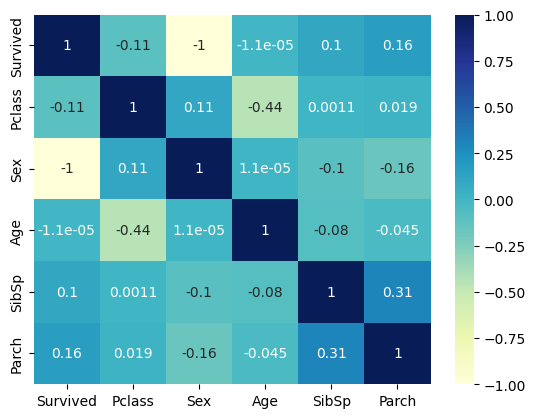

In [161]:
sns.heatmap(ds.corr(), cmap='YlGnBu', annot=True)
plt.show()

Our assumption was right, we can see here 'Pclass' and 'Survived' variables are both positively correlated to each other which means, if the passenger ticket class is increasing, so the chances of survival of the person also get increases.

<Axes: >

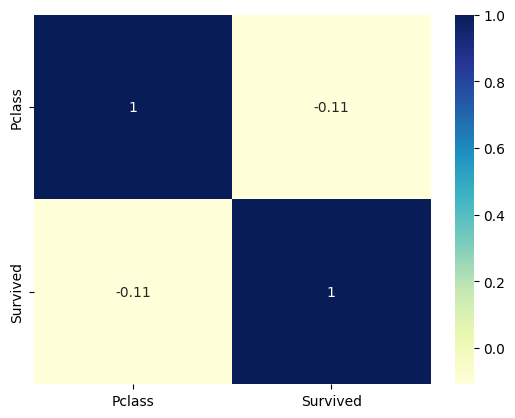

In [162]:
sns.heatmap(ds[['Pclass', 'Survived']].corr(), cmap='YlGnBu', annot=True)

In [163]:
X = ds.iloc[:, 1:7]
y = ds['Survived']

In [164]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [165]:
X_train.shape, y_train.shape

((334, 5), (334,))

In [166]:
# reshaped_arrays = []
# for arr in [X_train, y_train, X_test, y_test]:
#     reshaped_arrays.append(np.reshape(arr, (-1, 1)))
# X_train_reshaped, y_train_reshaped, X_test_reshaped, y_test_reshaped = reshaped_arrays

# ##### OR #####

# # X_train_reshaped = np.reshape(X_train, (-1,1))
# y_train = np.reshape(y_train, (-1,1))
# # X_test_reshaped = np.reshape(X_test, (-1,1)
# y_test_reshaped = np.reshape(y_test, (-1,1))


# print(X_train_reshaped.shape)
# print(y_train_reshaped.shape)
# print(X_test_reshaped.shape)
# print(y_test_reshaped.shape)

In [167]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

In [168]:
log_reg.fit(X_train, y_train)
classes_ = log_reg.classes_
X_train_pred = log_reg.predict(X_train)
X_train_pred

array([1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,

In [169]:
y_test_pred = log_reg.predict(X_test)
y_test_pred

array([0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0], dtype=int64)

# PERFORMANCE METRICS

In [173]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_test_pred)

print("\nClassification Report:\n", report)



Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        51
           1       1.00      1.00      1.00        33

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84

